### First ideas:
On the users.csv file we'll:
- Try K-modes,hierarchical clustering and fuzzy c-means

In [48]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

# Load the dataset
df = pd.read_csv("../datasets/users.csv")
display(df)
# Get 1-hot encoded dataset
df_onehot = pd.get_dummies(df)

display(df_onehot)

,CT,CU,LT,TC
0,CT_range_4,CU_range_1,LT_range_4,sport
1,CT_range_1,CU_range_4,LT_range_1,ECommerce
2,CT_range_1,CU_range_5,LT_range_4,ECommerce
3,CT_range_1,CU_range_5,LT_range_4,ECommerce
4,CT_range_1,CU_range_4,LT_range_4,ECommerce
...,...,...,...,...
317,CT_range_2,CU_range_1,LT_range_4,sport
318,CT_range_3,CU_range_1,LT_range_4,sport
319,CT_range_1,CU_range_3,LT_range_4,sport
320,CT_range_2,CU_range_1,LT_range_4,sport


,CT_CT_range_1,CT_CT_range_2,CT_CT_range_3,CT_CT_range_4,CU_CU_range_1,CU_CU_range_3,CU_CU_range_4,CU_CU_range_5,LT_LT_range_1,LT_LT_range_2,LT_LT_range_3,LT_LT_range_4,TC_ECommerce,TC_game,TC_holiday,TC_sport
0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
318,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
319,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
320,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 1090.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

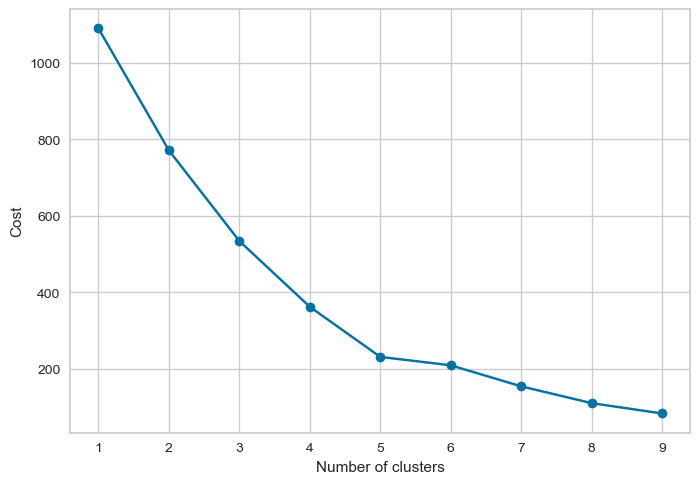

In [49]:
from kmodes.kmodes import KModes
from yellowbrick.cluster import KElbowVisualizer

costs = []
for k in range(1, 10):
    km = KModes(n_clusters=k, init='Huang', n_init=20, verbose=1)
    km.fit(df_onehot)
    costs.append(km.cost_)

# Plot the inertia as a function of k
plt.plot(range(1, 10), costs, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

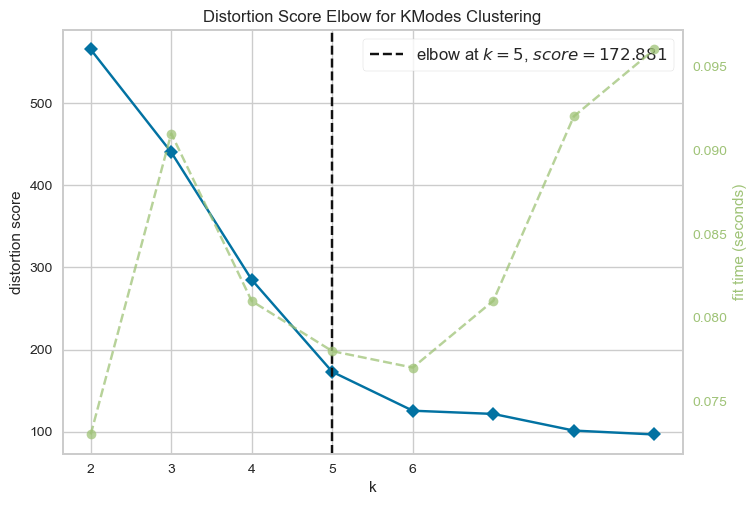

In [50]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KModes(), k=(2,10),ax=ax)
visualizer.fit(df_onehot)
ax.set_xticks(range(2,7))

visualizer.show()
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20, cost: 358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 27, cost: 452.0
Run 5, iteration: 2/100, moves: 11, cost: 452.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 74, cost: 283.0
Run 6, iteration: 2/100, moves: 64, cost: 249.0
Run 6, iteration: 3/100, moves: 11, cost: 249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, ite

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


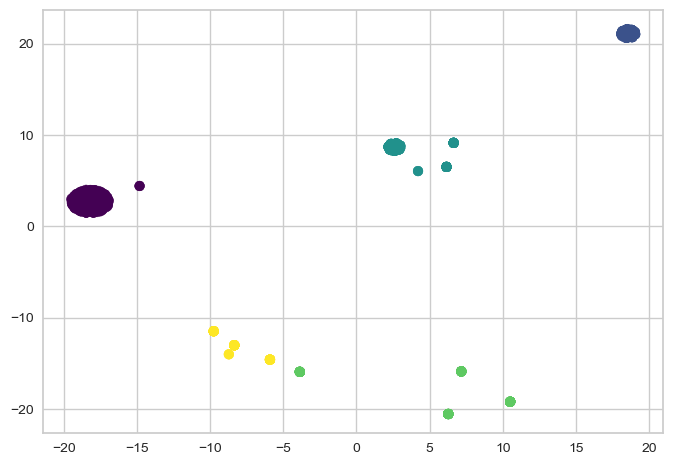

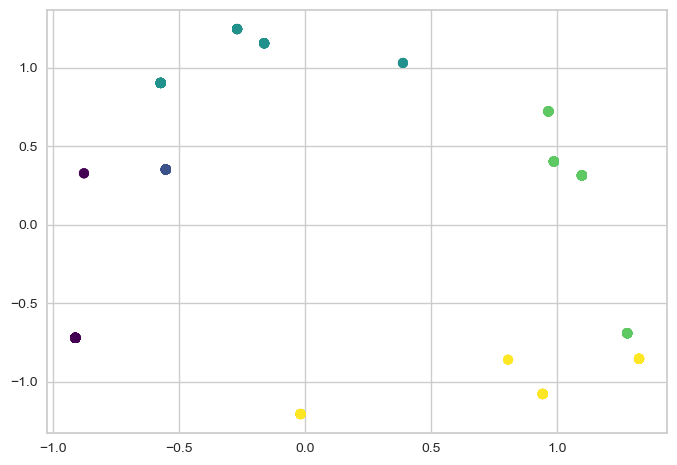

In [51]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Perform k-modes clustering
km = KModes(n_clusters=5, init='Huang', n_init=20, verbose=1)
clusters = km.fit_predict(df_onehot)

# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df_onehot)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.show()

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_onehot)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.show()

c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


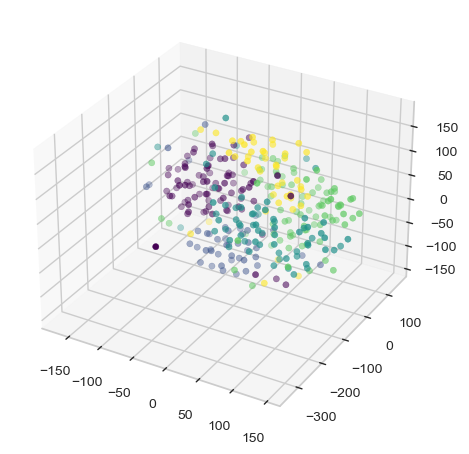

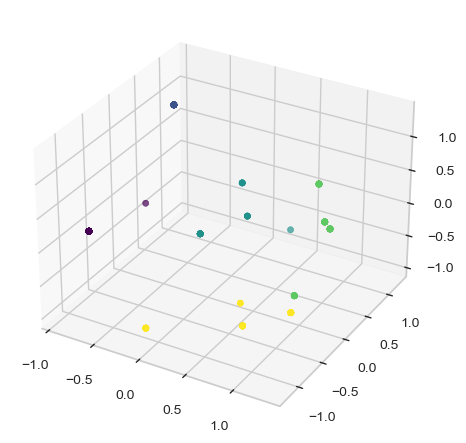

In [52]:
# Visualize the clusters using t-SNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(df_onehot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=clusters, cmap='viridis')
plt.show()

# Visualize the clusters using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_onehot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
plt.show()

In [53]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute the silhouette score
silhouette = silhouette_score(df_onehot, clusters)
print("Silhouette score: {:.3f}".format(silhouette))

# Compute the Calinski-Harabasz index
calinski = calinski_harabasz_score(df_onehot, clusters)
print("Calinski-Harabasz index: {:.3f}".format(calinski))

# Compute the Dunn index
dunn = davies_bouldin_score(df_onehot, clusters)
print("Dunn index: {:.3f}".format(dunn))


Silhouette score: 0.673
Calinski-Harabasz index: 269.334
Dunn index: 0.766


Hierarchical clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering
hier_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward') #'ward', 'complete', 'average', 'single'

# Fit the model to the data
hier_cluster.fit(df_onehot)

# Predict the cluster labels for the data
clusters = hier_cluster.labels_


c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Gabriele\miniconda3\envs\smbud\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


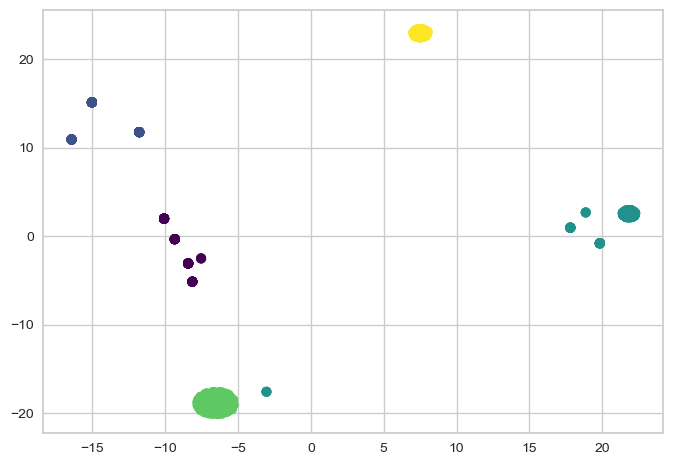

In [55]:
# Visualize the clusters using t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df_onehot)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.show()

In [56]:
# Compute the silhouette score
silhouette = silhouette_score(df_onehot, clusters)
print("Silhouette score: {:.3f}".format(silhouette))

# Compute the Calinski-Harabasz index
calinski = calinski_harabasz_score(df_onehot, clusters)
print("Calinski-Harabasz index: {:.3f}".format(calinski))

# Compute the Dunn index
dunn = davies_bouldin_score(df_onehot, clusters)
print("Dunn index: {:.3f}".format(dunn))

Silhouette score: 0.687
Calinski-Harabasz index: 286.568
Dunn index: 0.754
